# 머신러닝 분류 모델 평가

## 머신러닝
- <b>데이터가공/변환 -> 모델 학습/예측 -> 평가</b> 프로세스로 구성됨
- 분류의 평가 방법도 일반적으로 실제 결과 데이터와 예측 결가 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만, 단순히 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있음
```
예시>

    ex) 남 28명, 여2명인 집단에서 이 집단은 남성으로 구성되어있다 -> 이미 남자의 구성비율이 높기 때문에 예측이 90프로이상 맞게 됨
    
    -> 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 정확도를 활용하는 것은 적합한 방법이 아니다.
```


## 분류 성능 평가 지표

<b>오차행렬</b>
- 이진 분류에서 성능 지표로 활용됨
- 학습된 분류 모델이 예측을 수행하면서 예측 오류가 얼마인지 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 나타냄

<img src = 'https://velog.velcdn.com/images%2Fsset2323%2Fpost%2F2fb704cf-8556-40fc-87a2-75b8feb32986%2Fimage.png' width = '600px'> 

일반적으로 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0을 부여하는 경우가 많음
```
    ex) 암이 양성 -> 1, 음성-> 0
    ex2) 사기 행위 예측모델 사기 -> 1, 정상 -> 0
```
불균형한 이진 분류 세트에서 Positive 건수가 매우 적기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다 Negative 예측 정확도가 높아지는 경향이 발생함. 
따라서, 불균형한 데이터 세트에서는 Positive 데이터 세트 예측에 초점을 맞춘 평가 지표인 정밀도/재현율이 더 선호됨

<b>1. Accuracy(정확도): 실제 전체 데이터에서 예측 데이터가 얼마나 같은지 평가</b>

    - (TN + TP)/(TN + TP + FN + FP)
    
<b>2. Recall(재현율, 민감도, TPR): 실제가 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율</b>

    - TP / (TP + FP)
    
<b>3. Precision(정밀도): 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율</b>

    - TP / (FN + TP)
    
<b>4. F1 Score: 정밀도와 재현율을 결합한 지표로, 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐</b>
    
    - (2* 재현율 * 정밀도)/(재현율 + 정밀도)
    
가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것



In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
tdf = pd.read_csv('titanic_train.csv')
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [58]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

# 평가 사용자함수
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3: .4f}'.format(accuracy , precision ,recall, f1))

In [21]:
y_tdf = tdf['Survived']
X_tdf = tdf.drop('Survived', axis = 1)
X_tdf = transform_features(X_tdf)

X_train, X_test, y_train, y_test = train_test_split(X_tdf, y_tdf, 
                                                    test_size= 0.2, random_state = 11)

# solver: 최적화에 사용할 알고리즘 결정('newton-cg', 'lbfgs',' liblinear', 'sag','saga')
lr_clf = LogisticRegression(solver = 'liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, f1:  0.7966


#### 과제 1: 정확도, 정밀도, 재현율, f1 score 수작업으로 구하기
상기 오차 행렬로 수작업으로 정확도, 정밀도, 재현율, F1 score을 구하기

In [32]:
import pandas as pd
import numpy as np
cf = pd.DataFrame(np.array([['TN','FP'],['FN','TP']]), 
                  columns = ['예측 N', '예측 P'],
                  index = ['실제 N', '실제 P'])
cf_real = pd.DataFrame(np.array([[108,10],[14,47]]), 
                       columns = ['예측 N', '예측 P'],
                       index = ['실제 N', '실제 P'])
print(f'오차행렬:')
display(cf, cf_real)



# 정확도(True(실제 = 예측) / 전체)
accuracy =  (cf_real.iloc[0,0] + cf_real.iloc[1,1]) / cf_real.sum().sum()
print(f'정확도: {accuracy: .4f}')


# 정밀도( Positive(실제, 예측) / Positive (예측) )
precision = cf_real.iloc[1,1] / (cf_real.iloc[0,1] + cf_real.iloc[1,1])
print(f'정밀도: {precision: .4f}')


# 재현율( Positive(실제, 예측) / Positive (실제))
recall = cf_real.iloc[1,1] / (cf_real.iloc[1,0] + cf_real.iloc[1,1])
print(f'재현율: {recall: .4f}')


#f1 score = 2*(정밀도 * 재현율)/(정밀도 + 재현율)
f1 = 2*precision*recall / (precision + recall)
print(f'f1 score : {f1:.4f}')

오차행렬:


,예측 N,예측 P
실제 N,TN,FP
실제 P,FN,TP


,예측 N,예측 P
실제 N,108,10
실제 P,14,47


정확도:  0.8659
정밀도:  0.8246
재현율:  0.7705
f1 score : 0.7966


#### 과제2.
Precision과 Recall 간의 Trade-off 관계를 시각화하여 설명하기

p164 참고

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터 재로딩, 가공, 학습 데이터/테스트데이터 분할
tit_df = pd.read_csv('titanic_train.csv')
y_titanic_df = tit_df['Survived']
X_titanic_df = tit_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)
print('\n')


# 예측확률 array 생성
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f'pred_proba() shape: {pred_proba.shape}')
print(f'pred_proba() 결과: \n {pred_proba[:3]}')
print('\n')


# 예측확률 array와 예측 결과값 array 병합
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('두 개의 class 중 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, f1:  0.7966


pred_proba() shape: (179, 2)
pred_proba() 결과: 
 [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]


두 개의 class 중 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [71]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값
threshold = 0.5

# predict_proba()에서 'Positive' 클래스 칼럼 하나만 추출
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

# Binarizer 적용 -> 0.5이상이면 1 반환, 아니면 0 반환
binarizer = Binarizer(threshold = threshold).fit(pred_proba_1)
predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, f1:  0.7966


In [72]:
# Binarizer의 threshold 설정값, 분류 결정 임곗값
threshold = 0.4

binarizer = Binarizer(threshold = threshold).fit(pred_proba_1)
predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, f1:  0.7576


- 임곗값 감소 -> TP, FP 증가, FN 감소, 정밀도 감소, 재현율 증가

In [84]:
# 최적 임곗값 찾기

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, threshold):
    for t in thresholds:
        binarizer = Binarizer(threshold = t).fit(pred_proba_c1)
        predict = binarizer.transform(pred_proba_c1)
        print('임곗값: ', t)
        get_clf_eval(y_test, predict)
        print('\n')
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값:  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, f1:  0.7576


임곗값:  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, f1:  0.7869


임곗값:  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, f1:  0.7966


임곗값:  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, f1:  0.7965


임곗값:  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, f1:  0.8000




In [98]:
from sklearn.metrics import precision_recall_curve

# 로지스틱회귀방식으로 레이블 값이 1(Positive)일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]


# 다양한 확률 임곗값에 대한 정밀도<->재현율 쌍을 계산
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류결정 임곗값 배열의 shape: ', thresholds.shape)


# 반환된 임곗값을 15개 간격으로 10개 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플용 임곗값 10개:', np.round(thresholds[thr_index], 2))


# 임곗값에 따른 정밀도, 재현율 값
print('임곗값별 정밀도: ', np.around(precisions[thr_index],3))
print('임곗값별 재현율: ', np.around(recalls[thr_index],3))

반환된 분류결정 임곗값 배열의 shape:  (147,)
샘플용 임곗값 10개: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
임곗값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
임곗값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


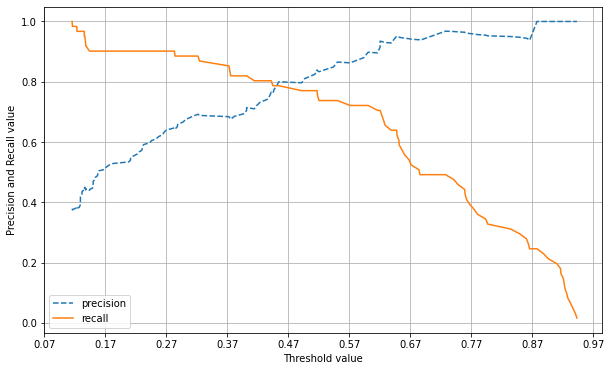

In [107]:
# 해당 정밀도와 재현율 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    
    # 임곗값에 따른 정밀도, 재현율 계산
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 thresholds, y축을 정밀도, 재현율 값으로 plot화
    fig = plt.figure(figsize = (10,6))
    threshold_boundary = thresholds.shape[0]
    
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # x축 단위를 0.1로 지장
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, grid 지정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

<b> ROC 곡선과 AUC 스코어</b>
- 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
- <b>ROC 곡선</b>
    - FPR이 변할 때, TPR이 어떻게 변하는지 나타내는 곡선
    - TPR(재현율,민감도, True Positive Rate(실제가 Positive이며 정확하게 예측되어야 하는 수준): TP/(FN + TP))
    - FPR(False Positive Rate(실제가 Negative이며 정확하게 예측되지 않는 수준): FP/(FP + TN))
    
      = 1 - TNR(특이도, True Negative Rate(실제가 Negative이며 정확하게 예측되어야 하는 수준): TN/(FP + TN)
    
    - 아래의 사진은 ROC 곡선의 예로, 직선은 ROC곡선의 최저 값임
    - ROC곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것
    - FPR을 0->1까지 변경하면서 TPR의 변화 값을 구함
        -> 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이기 때문에 FPR을 0으로 만들기 위해 임곗값을 1로 지정하면 됨
- <b>ROC AUC 값</b>
    - ROC 곡선 및의 면적을 구한 것으로 일반적으로 1에 가까울수록 좋은 수치임
    - AUC값이 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건임

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSx6xyW1Rf_j_D2gIA1f4A_nw_tiUYUrvWDDw&usqp=CAU' width = '300px'>



#### 과제3.
ROC Curve, AUC를 시각화하여 의미를 설명하고 ROC, AUC 구하기

In [129]:
from sklearn.metrics import roc_curve

# 로지스틱회귀방식으로 레이블 값이 1(Positive)일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

#반환된 임곗값 배열에서 5개 간격으로 추출
thr_index = np.arange(1, thresholds.shape[0], 5)
print(np.round(thresholds[thr_index], 2))

print('FPR: ', np.round(fprs[thr_index], 3))
print('TPR: ', np.round(tprs[thr_index], 3))

[0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


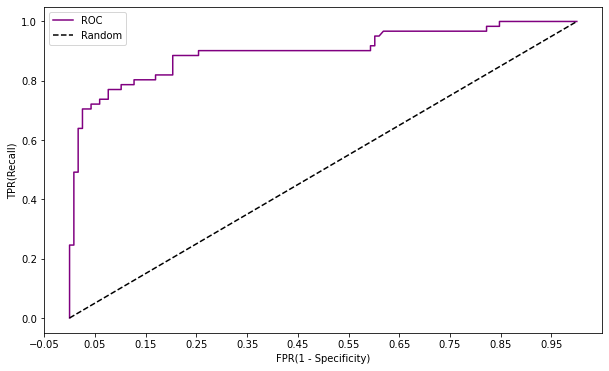

In [123]:
# 시각화

def roc_curve_pot(y_test, pred_proba_c1):
    # 임곗값에 따른, TPR, FPR 값 반환
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (10,6))
    
    # ROC 곡선 그리기
    plt.plot(fprs, tprs, label = 'ROC', color = 'purple')
    
    # 가운데 직선 그리기
    plt.plot([0,1], [0,1], 'k--', label = 'Random')
    
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('FPR(1 - Specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_pot(y_test, pred_proba[:,1])

In [128]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)

print(f'ROC AUC 값: {roc_score: .3f}')

ROC AUC 값:  0.899


## 피마 인디언 당뇨병 예측
* 데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터임.
* 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생

<b>[과제] diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.</b>
- SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가

<b>※ 피처 정보 </b>

'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'
